![example](./images/banner-949931_1280.jpg)

# Movie Analysis for Microsoft Studios

**Authors**: [Paul Lindquist](https://www.linkedin.com/in/paul-lindquist/), [Steven Addison](https://www.linkedin.com/in/addisonse/), [Sumedh Bhardwaj](https://www.linkedin.com/in/sumedh-bhardwaj-932767202/), [Wahaj Dar](https://www.linkedin.com/in/wahaj-dar-/)

## Overview
***
This project postulates that Microsoft is launching a movie studio. We use exploratory data analysis to pitch recommendations to their stakeholders.

## Business Problem
***
As this is a new venture for Microsoft, we want to be cognizant of cost and profitability. We offer several, data-driven approaches to maximize return.

Questions we'll answer:
* What genres of movies are lower risk to target as an entry point into the industry?
* Are there types of movies or specific directors and actors that yield higher revenues?
    * Does Microsoft have a catalogue of such content at their disposal?
* When is the most profitable time to release movies?
* Who are Microsoft's competitors and can anything be learned from their releases?

## Data
***
We use historical and categorical data from the box office and current movie landscape – release date, directors, actors, etc. – to examine correlations.

Focuses:
* Particular focus given to cost (budget) and gross revenue (worldwide)
* Drawing a correlation between revenue and genres, directors, actors, release date, etc.
* Sourced from: [Box Office Mojo](https://www.boxofficemojo.com/), [The Numbers](https://www.the-numbers.com/), [IMDB](https://www.imdb.com/)

## Topic 1: Entry Point Movies
***

### 1.1 Data Import
Using a table that highlights both cost ('production budget') and revenue ('worldwide gross').

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Open DataFrame highlighting production budget and worldwide gross revenue
b_and_p = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')

### 1.2 Data Cleaning and Filtering
The 'gross revenue' and 'production budget' columns need to be changed to integers to run calculations. We then run a simple '(revenue - budget) / revenue' calculation to create a sortable 'profit margin' column. Finally, we create a 'top 50' list of movies sorted by 'profit margin' with corresponding genres.

In [3]:
# Convert string columns to integers and date-time columns
# Strip dollar signs and commas from integers
b_and_p['worldwide_gross'] = b_and_p['worldwide_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['production_budget'] = b_and_p['production_budget'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['domestic_gross'] = b_and_p['domestic_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['release_date'] = pd.to_datetime(b_and_p['release_date'])
b_and_p.dropna(subset=['production_budget', 'worldwide_gross'])
b_and_p.at[5189, 'movie'] = "God's Not Dead"
b_and_p.at[2996, 'movie'] = "The King's Speech"

In [4]:
# Filter by movies that grossed at least $1M worldwide and were made in the last 20 years
# Create a gross profit margin column and sort by it
b_and_p = b_and_p[b_and_p['worldwide_gross'] >= 1000000]
b_and_p = b_and_p[b_and_p['release_date'].dt.year >= 1999]
b_and_p['profit_margin_percent'] = (b_and_p['worldwide_gross'] - b_and_p['production_budget']) / b_and_p['worldwide_gross'] * 100
b_and_p['gross_margin_percent'] = b_and_p['worldwide_gross'] / b_and_p['production_budget'] * 100
b_and_p = b_and_p.sort_values(by=['gross_margin_percent'], ascending=False).reset_index(drop=True)

In [5]:
# Create a Top 50 list and hardcode genre/sorted genre for each movie
pd.options.mode.chained_assignment = None
top_50 = b_and_p.iloc[:50]
top_50['genre'] = ['Horror', 'Horror', 'Horror', 'Documentary', 'Musical', 'Comedy', 'Thriller',
                    'Christian', 'Horror', 'Documentary', 'Horror', 'Comedy', 'Christian',
                    'Horror', 'Horror', 'Horror', 'Thriller', 'Christian', 'Documentary', 'Horror',
                    'Romance', 'Foreign', 'Drama', 'Horror', 'Horror', 'Foreign', 'Horror',
                    'Documentary', 'Horror', 'Documentary', 'Comedy', 'Horror', 'Foreign', 'Horror',
                    'Foreign', 'Horror', 'Horror', 'Drama', 'Horror', 'Drama', 'Horror', 'Drama',
                    'Drama', 'Horror', 'Horror', 'Horror', 'Documentary', 'Comedy', 'Drama',
                    'Horror']

top_50['genre_sorted'] = ['Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Documentary', 'Documentary', 'Documentary', 'Documentary',
                          'Documentary', 'Documentary', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
                          'Drama', 'Foreign', 'Foreign', 'Foreign', 'Foreign', 'Comedy', 'Comedy',
                          'Comedy', 'Comedy', 'Christian', 'Christian', 'Christian', 'Thriller',
                          'Thriller', 'Musical', 'Romance']

### 1.3 Data Analysis and Calculations
We merge our previous table with another table that has more movies and corresponding genres to create a larger dataset of movies. Then we filter down to a table of single genres and run averages on the budgets and gross revenues. We run another calculation to get return on investment (ROI) variables.

In [6]:
# Filter tables by genre, create averages for budget, revenue & ROI
genre_data = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
gross_genre_merge = b_and_p.merge(genre_data, left_on=['movie'], right_on=['primary_title'])
gross_genre_merge['genres'] = gross_genre_merge['genres'].str.replace(',', '')

horror_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("orro")==True]
horror_genre = horror_genre.drop_duplicates(subset=['movie'])
horror_budg = horror_genre['production_budget'].mean()
horror_rev = horror_genre['worldwide_gross'].mean()

drama_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("rama")==True]
drama_genre = drama_genre.drop_duplicates(subset=['movie'])
drama_budg = drama_genre['production_budget'].mean()
drama_rev = drama_genre['worldwide_gross'].mean()

comedy_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("omedy")==True]
comedy_genre = comedy_genre.drop_duplicates(subset=['movie'])
comedy_budg = comedy_genre['production_budget'].mean()
comedy_rev = comedy_genre['worldwide_gross'].mean()

action_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("ction")==True]
action_genre = action_genre.drop_duplicates(subset=['movie'])
action_budg = action_genre['production_budget'].mean()
action_rev = action_genre['worldwide_gross'].mean()

horror_roi = ((horror_rev - horror_budg) / horror_budg) * 100
drama_roi = ((drama_rev - drama_budg) / drama_budg) * 100
comedy_roi = ((comedy_rev - comedy_budg) / comedy_budg) * 100
action_roi = ((action_rev - action_budg) / action_budg) * 100

### 1.4 Data Visualization
We plot a bar chart to compare the genre subgroups against each other. A second bar chart compares each genre's cost (budget), revenue and ROI.

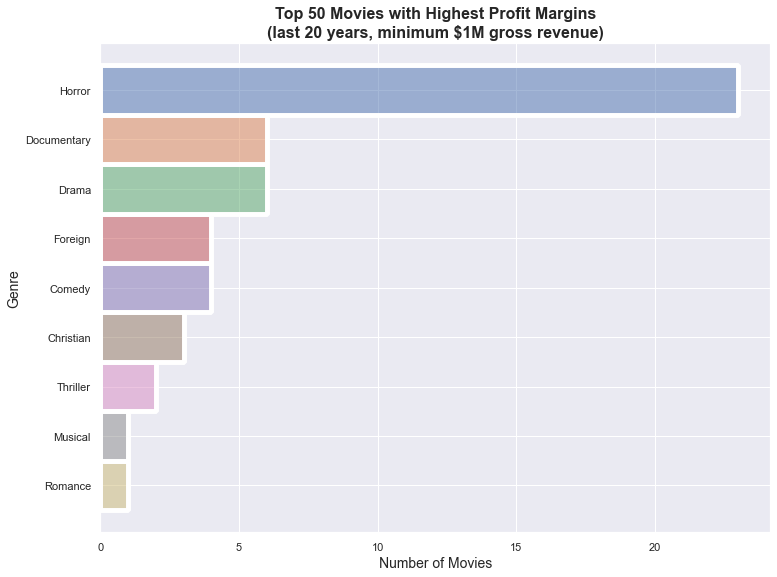

In [8]:
# Plot histogram highlighting Top 50 movies w/ highest GM by genre
genre_hist = sns.histplot(data=top_50, y='genre_sorted', hue="genre_sorted", legend=False)
sns.set(rc={'figure.figsize':(12,9)})
plt.xlabel('Number of Movies', size=14)
plt.ylabel('Genre', size=14)
plt.title('Top 50 Movies with Highest Profit Margins\n(last 20 years, minimum $1M gross revenue)',
         size=16, weight=900);

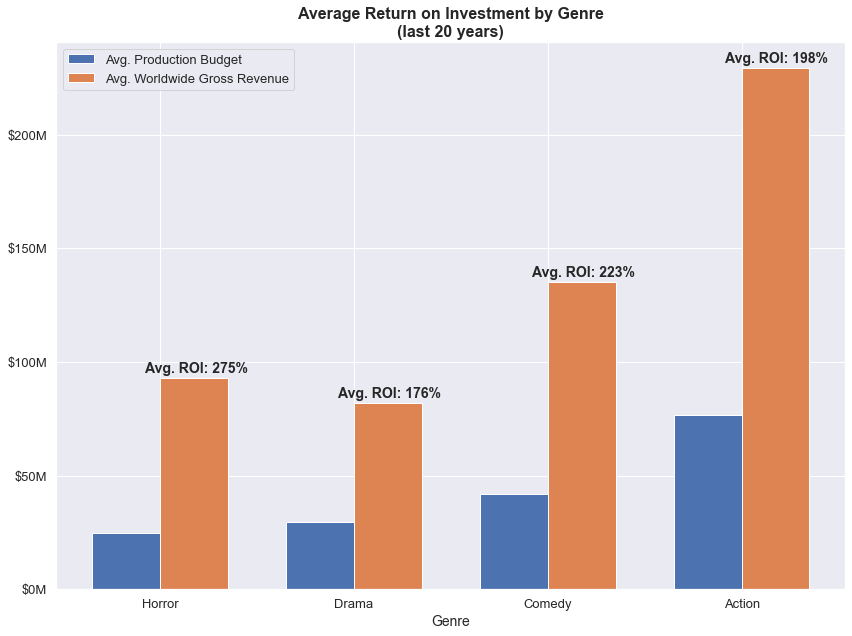

In [14]:
# Plot bar graph with avg. budget, revenue and ROI by genre

from matplotlib.ticker import FuncFormatter

all_labels = ['Horror', 'Drama', 'Comedy', 'Action']
prod_budg = [horror_budg, drama_budg, comedy_budg, action_budg]
all_revs = [horror_rev, drama_rev, comedy_rev, action_rev]
horror_roi = 'Avg. ROI: 275%'
comedy_roi = 'Avg. ROI: 223%'
drama_roi = 'Avg. ROI: 176%'
action_roi = 'Avg. ROI: 198%'

x_paul = np.arange(len(all_labels))
width_paul = 0.35
y_paul = np.arange(4)
def millions(x, pos):
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

cost_rev, ax = plt.subplots()
rects1_paul = ax.bar(x_paul - width_paul/2, prod_budg, width_paul, label='Avg. Production Budget')
rects2_paul = ax.bar(x_paul + width_paul/2, all_revs, width_paul, label='Avg. Worldwide Gross Revenue')

ax.set_xlabel('Genre', size=14)
ax.set_title('Average Return on Investment by Genre\n(last 20 years)', size=16, weight=900)
ax.set_xticks(x_paul)
ax.set_xticklabels(all_labels, size=13)
ax.legend()
plt.rc('legend', fontsize=13)
ax.yaxis.set_major_formatter(formatter)
plt.yticks(fontsize=13)

plt.figtext(0.174, 0.415, horror_roi, fontsize=14, weight="bold")
plt.figtext(0.398, 0.377, drama_roi, fontsize=14, weight="bold")
plt.figtext(0.622, 0.563, comedy_roi, fontsize=14, weight="bold")
plt.figtext(0.846, 0.894, action_roi, fontsize=14, weight="bold")

cost_rev.tight_layout();

### 1.5 Evaluation

**An early focus should be placed on making horror movies.** According to the data, they historically yield the lowest average cost and highest average profit margins. They'll serve as an initial, lower-risk entry point.

## Overall Conclusions
***
Based on our analysis, we make the following suggestions for the business:

* **An early focus should be placed on making horror movies.** According to the data, they historically yield the lowest average cost and highest average profit margins. They'll serve as an initial, lower-risk entry point.
* **When moving into big budget, blockbuster movies, target specific directors and/or actors who've historically yielded high box office revenues.** Top 3 directors: Russo brothers, Joss Whedon, James Wan. Top 3 actors: Robert Downey Jr., Chris Evans, Dwayne 'The Rock' Johnson. Top 3 actresses: Scarlett Johansson, Jennifer Lawrence, Bryce Dallas Howard.
* **Explore creating movie franchises out of Microsoft intellectual property, namely video games.** 2 of the 3 largest studio competitors (Warner Bros, Fox) own DC Comics and Marvel, respectively. A comparable franchise could be fashioned from high-grossing Microsoft games (Halo, Gears of War, Forza Motorsport, etc.)
* **Release big budget movies in June, July and November.** These 3 months historically yield the highest revenues.